<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
!dir ..\data

 Volume in drive C is OS
 Volume Serial Number is AEAE-D4A4

 Directory of C:\Users\gghalachyan\Desktop\projects\ysu-python-2022\data

10/15/2022  03:40 PM    <DIR>          .
10/15/2022  03:40 PM    <DIR>          ..
08/29/2022  09:47 PM    <DIR>          final_project
10/14/2022  10:57 PM            11,531 img_ex.jpg
10/15/2022  10:25 AM            81,631 pg69158.txt
12/03/2021  10:09 PM            61,194 titanic_train.csv
10/15/2021  11:45 PM               876 zen_of_python.txt
10/15/2022  03:30 PM               139 zen_of_python_EDIT.csv
10/15/2022  03:40 PM               736 zen_of_python_EDIT.json
10/15/2022  03:26 PM               716 zen_of_python_EDIT.txt
               7 File(s)        156,823 bytes
               3 Dir(s)  153,293,168,640 bytes free


In [51]:
import pandas as pd
import numpy as np


pd.set_option('display.max_rows', 10) 

In [3]:
from pandas import DataFrame 

In [4]:
import csv

In [5]:
with open("../data/titanic_train.csv") as f:
    print(f.read())

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/

In [6]:
print(pd.read_csv.__doc__)


Read a comma-separated values (csv) file into DataFrame.

Also supports optionally iterating or breaking of the file
into chunks.

Additional help can be found in the online docs for
`IO Tools <https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html>`_.

Parameters
----------
filepath_or_buffer : str, path object or file-like object
    Any valid string path is acceptable. The string could be a URL. Valid
    URL schemes include http, ftp, s3, gs, and file. For file URLs, a host is
    expected. A local file could be: file://localhost/path/to/table.csv.

    If you want to pass in a path object, pandas accepts any ``os.PathLike``.

    By file-like object, we refer to objects with a ``read()`` method, such as
    a file handle (e.g. via builtin ``open`` function) or ``StringIO``.
sep : str, default ','
    Delimiter to use. If sep is None, the C engine cannot automatically detect
    the separator, but the Python parsing engine can, meaning the latter will
    be used and auto

In [7]:
df = pd.read_csv("../data/titanic_train.csv")

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.shape

(891, 12)

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
type(df['PassengerId'])

pandas.core.series.Series

In [13]:
type(df[['PassengerId', 'Pclass']])

pandas.core.frame.DataFrame

In [14]:
df['PassengerId'].unique().shape == df['PassengerId'].shape

True

In [15]:
df['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [16]:
(df['Pclass'].value_counts(normalize=True).round(4)*100).sort_values(ascending=False)

3    55.11
1    24.24
2    20.65
Name: Pclass, dtype: float64

In [17]:
(df['Survived'].value_counts(normalize=True).round(4)*100).sort_values(ascending=False)

0    61.62
1    38.38
Name: Survived, dtype: float64

In [18]:
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [19]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='all').round(2)

Survived,0,1
Pclass,,
1,0.09,0.15
2,0.11,0.10
3,0.42,0.13


In [20]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='index').round(2)

Survived,0,1
Pclass,,
1,0.37,0.63
2,0.53,0.47
3,0.76,0.24


In [21]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='columns').round(2)

Survived,0,1
Pclass,,
1,0.15,0.40
2,0.18,0.25
3,0.68,0.35


In [22]:
pd.crosstab([df['Pclass'], df['Sex']], df['Survived'], normalize='index').round(2)

Survived          0     1
Pclass Sex               
1      female  0.03  0.97
       male    0.63  0.37
2      female  0.08  0.92
       male    0.84  0.16
3      female  0.50  0.50
       male    0.86  0.14

In [23]:
pd.crosstab([df['Pclass'], df['Sex']], df['Survived'], normalize=False).round(2)

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df['Survived']==1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

<AxesSubplot: >

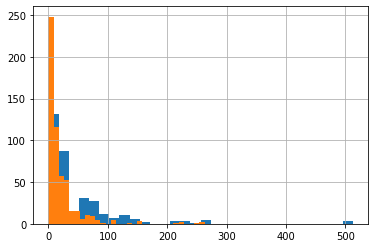

In [30]:
df["Fare"][df['Survived']==1].hist(bins=30)
df["Fare"][df['Survived']==0].hist(bins=30)

In [41]:
df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].split()[0])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [42]:
df['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Jonkheer.      1
Don.           1
Mme.           1
Lady.          1
Sir.           1
Ms.            1
the            1
Capt.          1
Name: Title, dtype: int64

In [44]:
pd.crosstab([df['Title']], df['Survived'], normalize='index').round(2)

Survived,0,1
Title,,
Capt.,1.00,0.00
Col.,0.50,0.50
Don.,1.00,0.00
Dr.,0.57,0.43
Jonkheer.,1.00,0.00
Lady.,0.00,1.00
Major.,0.50,0.50
Master.,0.42,0.57
Miss.,0.30,0.70


In [65]:
np.dtype('<S4')

dtype('S4')

In [66]:
df_1 = pd.read_csv(
    '../data/titanic_train.csv', 
    dtype = {
        "PassengerId": np.dtype('<S4'),
    }
)
df_1.dtypes # ??? object

PassengerId     object
Survived         int64
Pclass           int64
Name            object
Sex             object
                ...   
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Length: 12, dtype: object

In [67]:
df_2 = pd.read_csv(
    '../data/titanic_train.csv', nrows = 10
)

In [69]:
df_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [72]:
df = df.fillna(0)
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr.
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q,Mr.


---

In [74]:
with open("../../otto-kgl/data/raw/train.jsonl", 'r') as d:
    for i in range(10):
        line = d.readline()
        print(line)

{"session":0,"events":[{"aid":1517085,"ts":1659304800025,"type":"clicks"},{"aid":1563459,"ts":1659304904511,"type":"clicks"},{"aid":1309446,"ts":1659367439426,"type":"clicks"},{"aid":16246,"ts":1659367719997,"type":"clicks"},{"aid":1781822,"ts":1659367871344,"type":"clicks"},{"aid":1152674,"ts":1659367885796,"type":"clicks"},{"aid":1649869,"ts":1659369893840,"type":"carts"},{"aid":461689,"ts":1659369898050,"type":"carts"},{"aid":305831,"ts":1659370027105,"type":"orders"},{"aid":461689,"ts":1659370027105,"type":"orders"},{"aid":362233,"ts":1659370064916,"type":"clicks"},{"aid":1649869,"ts":1659370067686,"type":"clicks"},{"aid":1649869,"ts":1659371003682,"type":"clicks"},{"aid":984597,"ts":1659371033243,"type":"clicks"},{"aid":1649869,"ts":1659371042297,"type":"clicks"},{"aid":803544,"ts":1659371044075,"type":"clicks"},{"aid":1110941,"ts":1659371104329,"type":"clicks"},{"aid":1190046,"ts":1659371123063,"type":"clicks"},{"aid":1760685,"ts":1659375531385,"type":"clicks"},{"aid":631008,"ts"

In [77]:
df = pd.read_json('../../otto-kgl/data/raw/train.jsonl', nrows=1, lines=True)

In [83]:
type(df)

pandas.core.frame.DataFrame

In [82]:
df['events'][0]

[{'aid': 1517085, 'ts': 1659304800025, 'type': 'clicks'},
 {'aid': 1563459, 'ts': 1659304904511, 'type': 'clicks'},
 {'aid': 1309446, 'ts': 1659367439426, 'type': 'clicks'},
 {'aid': 16246, 'ts': 1659367719997, 'type': 'clicks'},
 {'aid': 1781822, 'ts': 1659367871344, 'type': 'clicks'},
 {'aid': 1152674, 'ts': 1659367885796, 'type': 'clicks'},
 {'aid': 1649869, 'ts': 1659369893840, 'type': 'carts'},
 {'aid': 461689, 'ts': 1659369898050, 'type': 'carts'},
 {'aid': 305831, 'ts': 1659370027105, 'type': 'orders'},
 {'aid': 461689, 'ts': 1659370027105, 'type': 'orders'},
 {'aid': 362233, 'ts': 1659370064916, 'type': 'clicks'},
 {'aid': 1649869, 'ts': 1659370067686, 'type': 'clicks'},
 {'aid': 1649869, 'ts': 1659371003682, 'type': 'clicks'},
 {'aid': 984597, 'ts': 1659371033243, 'type': 'clicks'},
 {'aid': 1649869, 'ts': 1659371042297, 'type': 'clicks'},
 {'aid': 803544, 'ts': 1659371044075, 'type': 'clicks'},
 {'aid': 1110941, 'ts': 1659371104329, 'type': 'clicks'},
 {'aid': 1190046, 'ts': 

In [85]:
pd.DataFrame(df['events'][0])

,aid,ts,type
0,1517085,1659304800025,clicks
1,1563459,1659304904511,clicks
2,1309446,1659367439426,clicks
3,16246,1659367719997,clicks
4,1781822,1659367871344,clicks
...,...,...,...
271,843110,1661684298768,clicks
272,938007,1661684355390,clicks
273,1228848,1661684528943,clicks
274,1740927,1661684942173,clicks


connecting to db - ORM tools (SQLAlchemy), pd.read_sql **ETL**

In [86]:
pd.read_sql

<function pandas.io.sql.read_sql(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, columns=None, chunksize: Union[int, NoneType] = None) -> Union[pandas.core.frame.DataFrame, Iterator[pandas.core.frame.DataFrame]]>